# Analyzing Loewnerized activations (split by target)
## starting with lenet 300-100

In [1]:
import numpy as np
import tensorly as tn
import math
import matlab.engine
import matplotlib.pyplot as plt

In [2]:
# load 300 node and 100 node layer activations
layer_300_path = '/home/matthewmerris/repos/TensorizedRatNets/data/Lenet300100/activations/test/99/ten_acts/300_node_act_tens.npz'
# layer_300_path = '/Users/matthewmerris/dev/research/TensorizedRatNets/data/Lenet300100/activations/test/99/loewnerized_acts/300_node_act_tens.npz'
layer_300 = np.load(layer_300_path)

layer_100_path = '/home/matthewmerris/repos/TensorizedRatNets/data/Lenet300100/activations/test/99/ten_acts/100_node_act_tens.npz'
# layer_100_path = '/Users/matthewmerris/dev/research/TensorizedRatNets/data/Lenet300100/activations/test/99/loewnerized_acts/100_node_act_tens.npz'
layer_100 = np.load(layer_100_path)

## start with 300 node layer

In [3]:
lwn_0s = layer_300.f.arr_0
lwn_1s = layer_300.f.arr_1
print(lwn_0s.shape)
print(lwn_1s.shape)
lwn_0s_1st_mode = tn.unfold(lwn_0s,0)
lwn_0s_2nd_mode = tn.unfold(lwn_0s,1)
lwn_0s_3rd_mode = tn.unfold(lwn_0s,2)
lwn_1s_1st_mode = tn.unfold(lwn_1s,0)
lwn_1s_2nd_mode = tn.unfold(lwn_1s,1)
lwn_1s_3rd_mode = tn.unfold(lwn_1s,2)


(150, 150, 979)
(150, 150, 980)


In [15]:
lwn_0s_a = lwn_0s[:,:,0:50]
print(lwn_0s_a.shape)
lwn_0s_b = lwn_0s[:,:,51:101]
print(lwn_0s_a.shape)

(150, 150, 50)
(150, 150, 50)


In [16]:
# craft modal unfoldings
lwn_0s_a_1st_mode = np.transpose(tn.unfold(lwn_0s_a,0))
lwn_0s_a_2nd_mode = np.transpose(tn.unfold(lwn_0s_a,1))
lwn_0s_a_3rd_mode = np.transpose(tn.unfold(lwn_0s_a,2))

lwn_0s_b_1st_mode = np.transpose(tn.unfold(lwn_0s_b,0))
lwn_0s_b_2nd_mode = np.transpose(tn.unfold(lwn_0s_b,1))
lwn_0s_b_3rd_mode = np.transpose(tn.unfold(lwn_0s_b,2))



In [17]:
U_a, S_a, Vh_a = np.linalg.svd(lwn_0s_a_1st_mode)
U_b, S_b, Vh_b = np.linalg.svd(lwn_0s_b_1st_mode)

In [21]:
print(S_a.shape)
S_ratios = np.empty(149)
for i in range(0,149):
    S_ratios[i] = S_a[i+1]/S_a[i]

print(S_ratios)

(150,)
[0.56433308 0.44889316 0.69531588 0.98315553 0.94233122 0.85064799
 0.94879414 0.87794259 0.95117152 0.94751218 0.98223661 0.94172108
 0.99144344 0.92170257 0.96569107 0.96365556 0.96325385 0.94480972
 0.97012089 0.96320909 0.95523838 0.97396641 0.96058435 0.97671369
 0.9731696  0.99404064 0.96694699 0.98857592 0.98540212 0.96424822
 0.97168094 0.96713192 0.95696502 0.95831649 0.99252316 0.99172818
 0.99207097 0.97792605 0.94298341 0.98829583 0.97806643 0.98703474
 0.96411285 0.95252151 0.96146757 0.98916077 0.99411588 0.98981906
 0.97856995 0.97238398 0.98000725 0.95401515 0.99565915 0.94753394
 0.99794698 0.97140094 0.99069322 0.9826844  0.98356411 0.97643658
 0.99532137 0.97228973 0.9492495  0.96664627 0.94614031 0.97810627
 0.96931634 0.9762341  0.98326599 0.97869075 0.97133968 0.98091349
 0.94786515 0.96276267 0.98571788 0.94805287 0.97535624 0.95236978
 0.99810322 0.93847632 0.97826729 0.9520868  0.94194819 0.96375032
 0.97136092 0.98737911 0.95230829 0.98247984 0.92421608

### Compare column spaces ala Domanov and De Lathauwer

In [2]:
# load activations and separate by target
targets_path = '../data/Lenet300100/activations/test/targets.npy'
targets = np.load(targets_path)

inputs_path = '../data/Lenet300100/activations/test/99/Linear_0.npy'
inputs_raw = np.load(inputs_path)

outputs_path = '../data/Lenet300100/activations/test/99/Rational_1.npy'
outputs_raw = np.load(outputs_path)

tensorlab_path = '~/ware/matlab_tools/tensorlab'

# reshape inputs and outputs to matrices
inputs = inputs_raw.reshape(-1, inputs_raw.shape[-1])
outputs = outputs_raw.reshape(-1, outputs_raw.shape[-1])
 
# instantiate empty containers for splitting activations according to target
i_targets = list()
o_targets = list()
for i in range(0,10):
    i_targets.append(np.empty((0,inputs.shape[1])))
    o_targets.append(np.empty((0,outputs.shape[1])))

# split activations according to targets
for idx, x in enumerate(targets):
    o_targets[x] = np.vstack([o_targets[x], outputs[idx, :]])
    i_targets[x] = np.vstack([i_targets[x], inputs[idx, :]])

In [3]:
# lets try for the "0" target
out_300_0s = o_targets[0]
in_300_0s = i_targets[0]
print(out_300_0s.shape)
print(out_300_0s.dtype)
print(in_300_0s.shape)
print(in_300_0s.dtype)

lwn_0s = list()
sz_dims = math.ceil(out_300_0s.shape[1]/3)

eng = matlab.engine.start_matlab()
s = eng.genpath(tensorlab_path)
eng.addpath(s, nargout=0)

for i in range(out_300_0s.shape[0]):
    tmp = np.asarray(eng.loewnerize(out_300_0s[i,:], 'T', in_300_0s[i,:], nargout=1))  # NOTE: hardcoded loewnerize to 'Order' 3 !!!
    lwn_0s.append(tmp)

print(lwn_0s[0].shape)


(979, 300)
float64
(979, 300)
float64
(100, 100, 100)


In [4]:
print(len(lwn_0s))
rank_0s = list()
Us_0s = list()
num_samps = 20
for i in range (num_samps):
    U, S, Vh = np.linalg.svd(np.transpose(tn.unfold(lwn_0s[i],0)))
    Us_0s.append(U)
    rank = 0
    for j in range(S.shape[0] - 1):
        if S[j] - S[j+1] < .01 and rank == 0:
            rank = j
            rank_0s.append(rank)

rank_0s = np.asarray(rank_0s)      
        

979


In [8]:
print(rank_0s)
print(Us_0s[0].shape[0])

[5 6 4 3 4 4 3 7 6 3 7 5 2 7 2 5 3 4 6 6]
10000


In [13]:
num_samps = 20
mix = np.zeros((num_samps,num_samps))

for i in range(num_samps):
    for j in range(num_samps):
        if i != j:
            # construct combined U matrix (rank_0s[i] columns from Us_0s[i] + rank_0s[j] columns from Us_0s[j]
            U_ij = np.concatenate([Us_0s[i][:, 0:rank_0s[i]], Us_0s[j][:,0:rank_0s[j]]], axis=1)
            U, S, Vh = np.linalg.svd(U_ij)
            if S[(rank_0s[j] + 1)] < 0.1:
                mix[i,j] = 1

print(mix)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [43]:
# apply method to the 1st 2 observed signals
U_0, S_0, Vh_0 = np.linalg.svd(np.transpose(tn.unfold(lwn_0s[0], 0)))
U_1, S_1, Vh_1 = np.linalg.svd(np.transpose(tn.unfold(lwn_0s[1], 0)))

In [68]:
S_0_ratios = np.empty(S_0.shape[0] - 1)
S_1_ratios = np.empty(S_1.shape[0] - 1)
S_0_diffs = np.empty(S_0.shape[0] - 1)
S_1_diffs = np.empty(S_1.shape[0] - 1)
for i in range (S_0.shape[0]-1):
    S_0_ratios[i] = S_0[i] / S_0[i+1]
    S_0_diffs[i] = S_0[i] - S_0[i+1]
    S_1_ratios[i] = S_1[i] / S_1[i+1]
    S_1_diffs[i] = S_1[i] - S_1[i+1]
print(S_0_ratios)

[1.70458947e+00 1.55531850e+03 4.96365932e+00 1.74181621e+00
 1.25667736e+00 1.14712649e+00 1.87740453e+00 1.08683063e+00
 1.49917156e+00 1.11066714e+00 1.21687536e+00 1.31416456e+00
 1.05418568e+00 1.04171136e+00 1.13641176e+00 1.14137398e+00
 1.05724146e+00 1.10517009e+00 1.21659023e+00 1.15702377e+00
 1.03483622e+00 1.01375032e+00 1.08053137e+00 1.05138224e+00
 1.07293154e+00 1.02844092e+00 1.01196157e+00 1.00926801e+00
 1.06732218e+00 1.00992104e+00 1.00878118e+00 1.01373932e+00
 1.02310991e+00 1.02088527e+00 1.07104045e+00 1.02461979e+00
 1.27912991e+00 1.01778101e+00 1.00549872e+00 1.07023494e+00
 1.05880891e+00 1.03995828e+00 1.15179130e+00 1.01606760e+00
 1.01457861e+00 1.08598002e+00 1.11114785e+00 1.07332252e+00
 1.02343790e+00 1.02150591e+00 1.06252083e+00 1.03434079e+00
 1.04444951e+00 1.02169768e+00 1.05160142e+00 1.06139560e+00
 1.12955413e+00 1.04491183e+00 1.09710765e+00 1.05632700e+00
 1.09561718e+00 1.01927349e+00 1.08205278e+00 1.02204915e+00
 1.01498242e+00 1.078794

[5.74599100e+02 8.14984732e+02 4.18700819e-01 4.49884969e-02
 1.23870796e-02 6.18957637e-03 1.96612931e-02 1.79028954e-03
 6.86513104e-03 1.37035710e-03 2.20688244e-03 2.43263200e-03
 3.98003259e-04 2.94109535e-04 8.46390557e-04 7.68529446e-04
 2.94325282e-04 4.89305367e-04 8.28289701e-04 5.18998995e-04
 1.11265506e-04 4.33222800e-05 2.34815204e-04 1.42499541e-04
 1.88514094e-04 7.14813601e-05 2.97079963e-05 2.28068428e-05
 1.55217688e-04 2.26492023e-05 1.98724454e-05 3.06716805e-05
 5.04252842e-05 4.46388763e-05 1.41766286e-04 4.79500247e-05
 4.25007156e-04 2.66006266e-05 8.18117984e-06 9.76400751e-05
 7.72147754e-05 5.04484817e-05 1.66385111e-04 1.73338888e-05
 1.55015557e-05 8.41850465e-05 9.79414785e-05 6.01967097e-05
 1.88015037e-05 1.68884872e-05 4.62083272e-05 2.45381677e-05
 3.04096449e-05 1.45289851e-05 3.28573458e-05 3.68324642e-05
 6.88078157e-05 2.28279852e-05 4.49894916e-05 2.47044894e-05
 3.82768612e-05 7.56954887e-06 2.97820447e-05 7.83035111e-06
 5.24219143e-06 2.555557

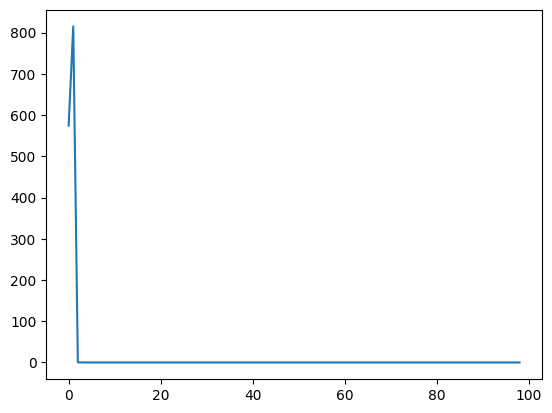

In [73]:
plt.plot(S_0_diffs)
print(S_0_diffs)


[8.36768483e+02 8.15878291e+02 4.31870454e+00 1.03213564e-01
 4.51325045e-02 5.02954307e-02 3.34284222e-03 1.93656414e-03
 1.41102810e-03 4.91327031e-03 2.48161832e-03 9.69428120e-03
 1.43684544e-04 4.14564285e-04 4.93954900e-04 1.86912833e-03
 3.99167617e-03 7.35423772e-04 1.66838175e-03 3.36596467e-04
 1.80111715e-04 6.08276479e-04 1.06123340e-03 2.69027468e-04
 5.08140623e-04 5.85790603e-05 4.97464680e-05 4.11586418e-04
 3.65788373e-04 4.64572181e-04 4.50392093e-04 9.32195187e-05
 7.91543769e-04 2.62847325e-04 2.46779710e-05 9.15308137e-04
 2.15418131e-04 3.54067155e-04 3.29348421e-04 2.45518586e-05
 8.83259050e-05 3.75994753e-05 1.52374813e-04 3.49477000e-04
 9.78998304e-05 1.06073812e-04 3.11471289e-05 7.80262854e-05
 1.09488189e-04 6.81063563e-05 2.62103677e-05 2.98481803e-05
 5.99599559e-06 1.40941686e-05 4.04434953e-05 1.11502226e-05
 2.51197501e-05 5.53142607e-05 1.38050745e-05 7.55687983e-05
 1.44564867e-05 3.06778885e-05 7.79358162e-05 5.77917127e-05
 2.06039099e-05 2.305979

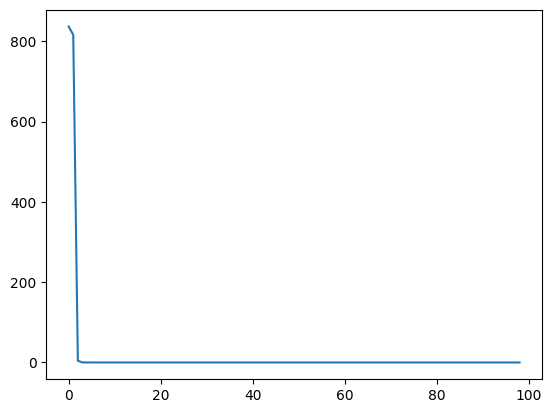

In [72]:
plt.plot(S_1_diffs)
print(S_1_diffs)